# Statistiques et Évolution de la fécondité en France via données publiques

Ce notebook vise à documenter l'évolution de la fertilité en France sur la période 2010-2018, en utilisant uniquement des sources de données publiques et librement accessibles.


### Biland démographique de l'INSEE

https://www.insee.fr/fr/statistiques/4281618?sommaire=1912926


### Sources de données utilisées:  
  1. Base naissance 2009-2018 ([lien INSEE](https://www.insee.fr/fr/statistiques/1893255)). Elle contient le nombre de naissances par commune et par année (1Mo).  
  2. Revenus et pauvreté des ménages ([lien INSEE](https://www.insee.fr/fr/statistiques/3560121)). Elle contient des informations par commune sur différents indicateurs comme le taux de pauvreté.  

  3. Bases naisssance pour une année donnée ([lien INSEE pour 20018](https://www.insee.fr/fr/statistiques/4215180?sommaire=4215184&q=naissances)). Elle contient toutes les naissances pour une année donnée, avec comme information le département de naissance, l'année de naissance des parents, le type d'activité professionnelle, etc. 800 000 observations (200Mo).  
  6. Recensements 1968-2016 ([lien INSEE](https://www.insee.fr/fr/statistiques/4248862?sommaire=2414232&q=naissances+de+%C3%A0)) 45 millions d'observations (2.65 Gb) 
  7. Bases de données sur le vote  
   
et répondre notamment aux questions suivantes:

Quelle sont les statistiques de bases concernant la fécondité en France sur la période 2010-2018.




### Variations géographiques:
- Est-ce que les communes les plus pauvres font plus d'enfants ?   
- Est-ce lié à la facilité de faire des enfants ?
- Est-ce lié aux charactéristiques des parents ?

In [67]:
import pyforest

from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

La fertilité en France est passée de 2 enfants par femme à 1.88 enfants par femme entre 2014 et 2018.

Nous cherchons à savoir si la diminution de la baisse de la fert

## Statistiques descriptives:
Nous utiliseront dans un premier temps trois bases. 
 1. La base revenu, qui nous donne le revenu moyen par commune issu de filosofi 2015
 2. La base naissance, qui donne le nombre de naissances par commune
 3. La base état civil, qui donne une observation par "accouchement" enregistré en France, avec des informations concernant les parents (age, etc)  ([documentation pdf](https://www.insee.fr/fr/statistiques/fichier/2406436/Contenu_etatcivil2015_nais2015.pdf))

In [68]:

data_path = "../fetched_data/"

In [69]:
df_revenus = pd.read_excel(data_path+"base-cc-filosofi-2015.xls", header = 5,sheet_name="COM"); print(df_revenus.shape) 


<IPython.core.display.Javascript object>

(35848, 29)


In [70]:
# https://www.insee.fr/fr/statistiques/1893255


df_naissances = pd.read_excel(data_path + "base_naissances_2018.xls", header = 5);print(df_naissances.shape)

<IPython.core.display.Javascript object>

(34953, 14)


In [71]:
df_naissances

,CODGEO,LIBGEO,REG,DEP,NAISD09,NAISD10,NAISD11,NAISD12,NAISD13,NAISD14,NAISD15,NAISD16,NAISD17,NAISD18
0,01001,L'Abergement-Clémenciat,84,01,13.0,7.0,7.0,5.0,8.0,8.0,13.0,7,8,10
1,01002,L'Abergement-de-Varey,84,01,3.0,0.0,7.0,1.0,5.0,3.0,5.0,6,4,1
2,01004,Ambérieu-en-Bugey,84,01,186.0,211.0,228.0,218.0,208.0,238.0,222.0,220,204,229
3,01005,Ambérieux-en-Dombes,84,01,21.0,27.0,22.0,21.0,26.0,17.0,15.0,14,18,21
4,01006,Ambléon,84,01,1.0,1.0,4.0,1.0,1.0,1.0,2.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34948,97420,Sainte-Suzanne,4,974,440.0,383.0,388.0,378.0,374.0,359.0,358.0,373,380,356
34949,97421,Salazie,4,974,143.0,104.0,125.0,150.0,139.0,127.0,111.0,130,133,101
34950,97422,Le Tampon,4,974,1323.0,1335.0,1295.0,1418.0,1292.0,1304.0,1339.0,1234,1180,1213
34951,97423,Les Trois-Bassins,4,974,124.0,111.0,102.0,96.0,98.0,102.0,104.0,110,100,96


In [72]:
35848 - 35340

508

La base revenus répertorie 35848 communes ; et la base naissances répertorie 35340 communes.
Il manque donc 508 communes dans le fichier naissances.  
Pourquoi ?


###### Hypothèse 1 : Les communes ou il n'y a pas eu de naissances ne sont pas dans le fichier

In [73]:
nais_year_variables =["NAISD{}".format(str(year).zfill(2)) for year in range(9,19) ]
(df_naissances[nais_year_variables].astype("float").sum(axis = 1) == 0).value_counts()

False    34776
True       177
dtype: int64

Faux, il y a 164 communes où il y a 0 naissances renseignées sur la période qui sont quand même dans la base.

##### Hypothèse 2 : Les communes ont changées (création, destruction ?)

In [74]:
print(len(set(df_naissances.LIBGEO) -  set(df_revenus.LIBGEO)),
len(  set(df_revenus.LIBGEO) - set(df_naissances.LIBGEO)))

450 1199


In [75]:
pd.Series(list(set(df_naissances.LIBGEO) -  set(df_revenus.LIBGEO))).head()

<IPython.core.display.Javascript object>

0      Arvière-en-Valromey
1     Saint-Pardoux-le-Lac
2                   Plémet
3        Forges de Lanouée
4    Bazouges Cré sur Loir
dtype: object

La vérification manuelle confirme bien que ce sont de nouvelles communes crées en 201x.

In [76]:
len(set(df_revenus.LIBGEO) ^ set(df_naissances.LIBGEO))

1649

In [77]:
### merge des deux tables
df = pd.merge(df_revenus, df_naissances, on = ["LIBGEO", "CODGEO"], how = "inner")

<IPython.core.display.Javascript object>

### Evolution des naissances par an

In [78]:
pd.DataFrame({"Nombre de naissances":df_naissances[nais_year_variables].set_axis(range(2009,2019), axis = 1).sum()}).T

<IPython.core.display.Javascript object>

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Nombre de naissances,822985.0,831495.0,821589.0,819191.0,809556.0,809328.0,787844.0,772128.0,757623.0,747060.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

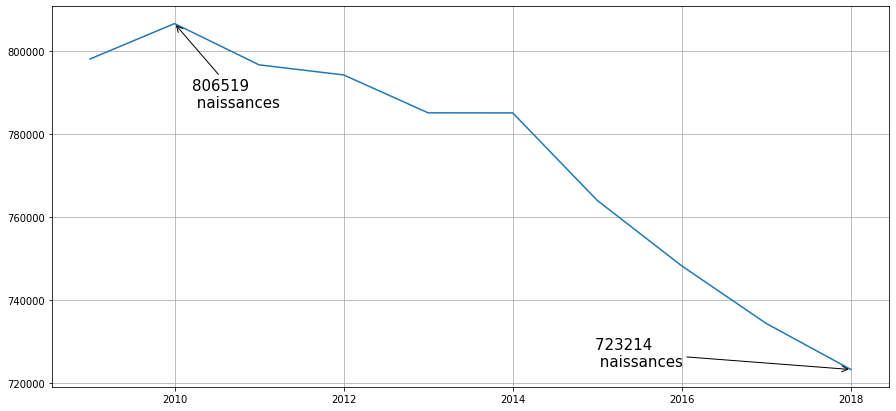

In [79]:
nais_by_year = df[nais_year_variables].sum()
nais_by_year.index = range(2009,2019)

min_nais_xy = ( nais_by_year.idxmin(), nais_by_year.min())
max_nais_xy = ( nais_by_year.idxmax(), nais_by_year.max())
plt.figure(figsize=(15,7))

nais_by_year.plot()
plt.annotate("{} \n naissances".format(int(min_nais_xy[1])),
             xy=min_nais_xy,
             xytext=(min_nais_xy[0]*0.9985,min_nais_xy[1]*1.001), arrowprops=dict(arrowstyle="->"), fontsize = 15)

plt.annotate("{} \n naissances".format(int(max_nais_xy[1])),
             xy=max_nais_xy,
             xytext=(max_nais_xy[0]*1.0001,max_nais_xy[1]*0.975), arrowprops=dict(arrowstyle="->"), fontsize = 15)
plt.grid()
#plt.plot([2012], [780000], marker=11)
#plt.arrow(2018,nais_by_year.min(),-1,5*10**3, width = 0.5)

#plt.xticks(np.arange(len(nais_year_variables)), range(2008,2019));

### Évolution par quintile

In [248]:
df["Quantile_income"] = pd.qcut(df.MED15, 5, labels = False)+1

In [268]:
df_quintile = df

In [269]:
a = df.groupby("Quantile_income")[nais_year_variables].sum().set_axis(range(2008,2018), axis = 1).astype("int")[2017]

In [270]:
display_side_by_side(
    [
        df.groupby("Quantile_income")[nais_year_variables].sum().set_axis(range(2008,2018), axis = 1).astype("int"),
        df.groupby("Quantile_income")[nais_year_variables].sum().set_axis(range(2008,2018), axis = 1).astype("int").divide(
            (df.groupby("Quantile_income")[nais_year_variables].sum().set_axis(range(2008,2018), axis = 1).astype("int")[2010].values), axis = 0)
    ],
    ["Raw numbers", "Noramalized numbers"])

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Quantile_income,,,,,,,,,,
1.0,230875,230668,229006,228986,226716,226621,220332,214354,209909,205219
2.0,139197,139763,137797,137232,134062,133648,128846,125485,122563,119580
3.0,118944,120424,118990,118631,117389,116455,112357,109533,107608,105122
4.0,116717,119526,117262,117115,116000,115904,113441,111341,109473,108745
5.0,190046,193912,191244,190105,188886,190402,187040,185598,182905,182868
,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Quantile_income,,,,,,,,,,
1.0,1.008161,1.007257,1.000000,0.999913,0.990000,0.989585,0.962123,0.936019,0.916609,0.896129
2.0,1.010160,1.014267,1.000000,0.995900,0.972895,0.969890,0.935042,0.910651,0.889446,0.867798


Raw numbers: ne veut rien dire tant que pas rapporté à la population par commune.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

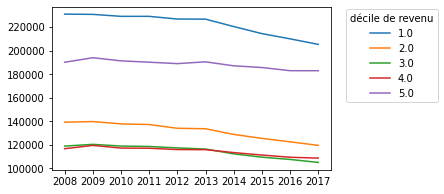

In [271]:
df.groupby("Quantile_income")[nais_year_variables].sum().T.plot(figsize=(5,3));
plt.legend(title = "décile de revenu",loc = "right", bbox_to_anchor = (1.4,0.7));
plt.xticks(np.arange(len(nais_year_variables)), range(2008,2018)); 

### Évolution par quintile normalisée

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

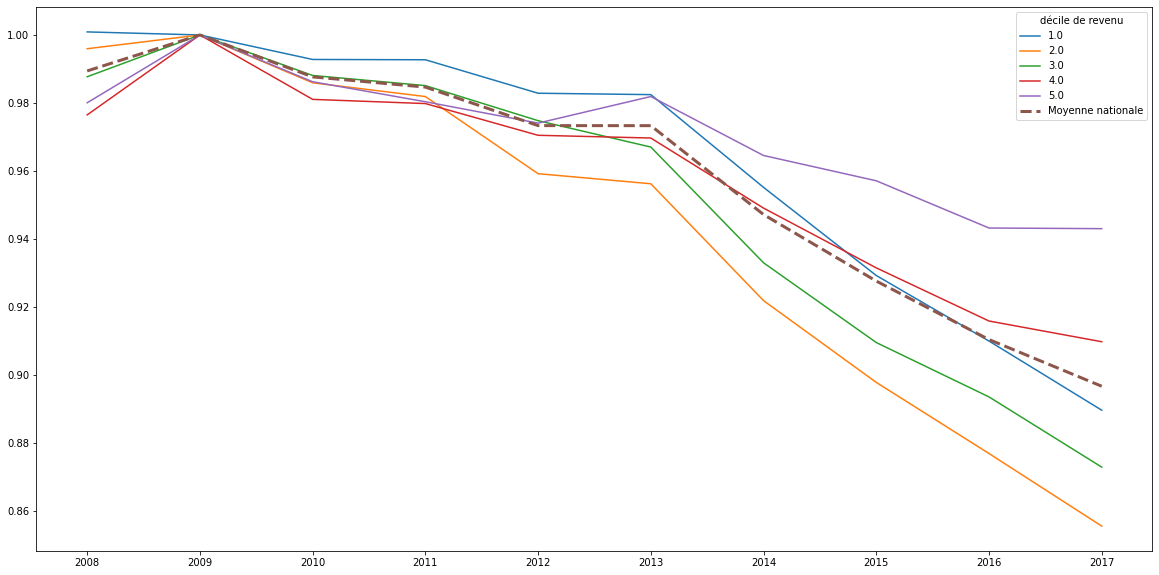

In [272]:
#Normalisé par décile
(df.groupby("Quantile_income")[nais_year_variables].sum().T/df.groupby("Quantile_income")["NAISD10"].sum().values).plot(figsize=(20,10))
plt.legend(title = "décile de revenu",loc = "upper right")

#Normalisé en total
(df[nais_year_variables].sum()/df["NAISD10"].sum()).plot(linestyle = "--", linewidth = 3, label = "Moyenne nationale") 
plt.legend(title = "décile de revenu", loc = "upper right")

plt.xticks(np.arange(len(nais_year_variables)), range(2008,2018));

Les communes qui connaissent la plus faible diminiution du nombre de naissance entre 2010 et 2018, sont les communes les plus riches  ; et donc potentiellement les communes les moins touchées par les réformes de la baisse du plafond du quotient familial et de la modulation des allocations familiales.

## Caractéristiques des parents

In [273]:
%%time
%%capture
from simpledbf import Dbf5
dbf = Dbf5('/Users/adrienpacifico/Downloads/etatcivil2017_nais2017_dbase/nais2017.dbf')
df_naissances_ec = dbf.to_dataframe(); print(df_naissances_ec.shape)
df_naissances_ec = df_naissances_ec.apply(lambda x:pd.to_numeric(x,errors ='ignore'));

CPU times: user 38.7 s, sys: 372 ms, total: 39.1 s
Wall time: 39.1 s


In [274]:
pd.read_csv(data_path+"Nais2018.csv", delimiter =";").columns

/Users/adrienpacifico/Library/Caches/pypoetry/virtualenvs/fertility-freely-available-data-sources-Ebk-O8z8-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['ANAIS', 'ACCOUCHR', 'AGEMERE', 'AGEPERE', 'AGEXACTM', 'AGEXACTP',
       'AMAR', 'ARECC', 'ARECM', 'ARECP', 'DEPDOM', 'DEPNAIS', 'DMARNAIS',
       'DURECEVP', 'INDLNM', 'INDLNP', 'INDNATM', 'INDNATP', 'JRECC', 'JRECM',
       'JRECP', 'MNAIS', 'MRECC', 'MRECM', 'MRECP', 'NBENF', 'ORIGINOM',
       'SEXE', 'SITUATMR', 'SITUATPR', 'TUCOM', 'TUDOM'],
      dtype='object')

In [275]:
set([str.upper(s) for s in df_naissances_ec.head().columns]) - set(pd.read_csv(data_path+"Nais2018.csv", delimiter =";").columns)

set()

In [276]:
df_naissances_ec.agepere.value_counts().shape

(30,)

<IPython.core.display.Javascript object>

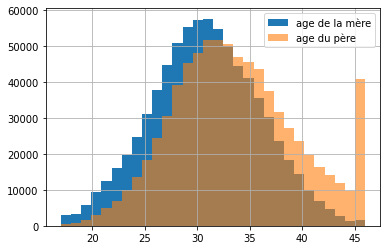

In [277]:
df_naissances_ec.agemere.hist(bins = 30, label = 'age de la mère')
df_naissances_ec.agepere.hist(alpha = 0.6,bins = 30,  label = 'age du père'); plt.legend();

In [278]:
df_naissances_ec.agemere.describe()

count    769553.000000
mean         30.781703
std           5.348357
min          17.000000
25%          27.000000
50%          31.000000
75%          34.000000
max          46.000000
Name: agemere, dtype: float64

TODO, faire la variation pour chaque année

#### Taux de non déclaration du père

In [279]:
df_naissances_ec.originom.value_counts(normalize = True, dropna = False) # 1 nom du père, 2 nom de la mère, 3 nom père-mère, 4 nom mère-père, 5 Autre

1.0    0.824405
3.0    0.086940
2.0    0.062061
4.0    0.024713
5.0    0.001344
NaN    0.000538
Name: originom, dtype: float64

### Situation professionnelle des parents à la naissance

In [280]:
pd.DataFrame({"Mère": df_naissances_ec.situatmr.value_counts(normalize = True, dropna = False), 
              "Père":df_naissances_ec.situatpr.value_counts(normalize = True, dropna = False)}
            ).rename({"S":"Salarié", "ND":"Inconnue", "NS":"Actif non salarié", np.NaN:"Non renseigné"})

<IPython.core.display.Javascript object>

,Mère,Père
Salarié,0.603006,0.714645
Inconnue,0.198323,0.180263
Non renseigné,0.173436,0.050453
Actif non salarié,0.025235,0.054640


### Nationalité 

In [281]:
pd.DataFrame({"Mère": df_naissances_ec.indnatm.value_counts(normalize = True, dropna = False), 
              "Père":df_naissances_ec.indnatp.value_counts(normalize = True, dropna = False)}
            ).rename({1:"Française", 2:"Étrangère", "NS":"Actif non salarié", np.NaN:"Non renseigné"})
    

<IPython.core.display.Javascript object>

,Mère,Père
Française,0.82375,0.831866
Étrangère,0.17625,0.168134


### Orignine

In [282]:
pd.DataFrame({"Mère": df_naissances_ec.indlnm.value_counts(normalize = True, dropna = False), 
              "Père":df_naissances_ec.indlnp.value_counts(normalize = True, dropna = False)}
            ).rename({1:"France", 2:"Drom",3:"Com",4:"Étranger",np.NaN:"Non renseigné"})
    

<IPython.core.display.Javascript object>

,Mère,Père
France,0.724192,0.715175
Étranger,0.234397,0.241002
Drom,0.033547,0.035522
Com,0.007864,0.008301


TODO mix origine et nationalité

### Moyen de garde d'enfants

In [283]:
# import urllib

# try:
    
#     df_moyen_de_garde = pd.read_csv("coucou", delimiter=",", low_memory=False)
# except FileNotFoundError:
#     url ="https://drees.solidarites-sante.gouv.fr/IMG/xlsx/l_offre_d_accueil_des_enfants_de_moins_de_3_ans_-_series_longues_et_resultats_detailles_2018.xlsx"
#     r = requests.get(url)
#     with open('garde_enfants_par_departement.xlsx', 'wb') as outfile:
#         outfile.write(r.content)
#     #df_votes = pd.read_csv("presidentielles_tour_1_2017.csv", delimiter=";", low_memory=False)

In [284]:
df_garde_enf_2018 = (pd.read_excel(data_path + "acceuil_enfants_2018.xlsx", header = 3,sheet_name=" T1 Total 2018"
                            ).drop(['Crèches collectives', 'Haltes-garderies', "Jardins d'éveil", "Jardins d'enfants"], axis=1)
                             .rename({"Total ":"Mono_acceuil", "Unnamed: 7":"Multi_acceuil", "Unnamed: 8":"tot_mono_multi_acceuil", "Unnamed: 1":"Nom_DEP"}, axis = 1)
                            .iloc[0:100,:-1]
               )

In [285]:
df_garde_enf_2010_2018 = (pd.read_excel(data_path + "acceuil_enfants_2018.xlsx", header = 2,sheet_name="T24 2010-2017 multi ETAB"
                            )
                            .iloc[0:100,:]
                            .rename({"DÉPARTEMENTS":"DEP"}, axis = 1)
               )
df_garde_enf_2010_2018[list(range(2010,2019))] = df_garde_enf_2010_2018[list(range(2010,2019))].apply(pd.to_numeric, errors='coerce')

In [286]:
df_garde_enf_2010_2018 = (pd.read_excel(data_path + "acceuil_enfants_2018.xlsx", header = 2,sheet_name="T14 2010-2018 total collec "
                            )
                            .iloc[0:100,:]
                            .rename({"DÉPARTEMENTS":"DEP"}, axis = 1)
               )
df_garde_enf_2010_2018[list(range(2010,2019))] = df_garde_enf_2010_2018[list(range(2010,2019))].apply(pd.to_numeric, errors='coerce')

In [287]:
df_garde_enf_2010_2018

,DEP,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,01,Ain,2204.0,2337.0,2496.0,2520.0,2675.0,2782.0,2891.0,3017.0,2994.0
1,02,Aisne,799.0,764.0,748.0,807.0,902.0,947.0,947.0,1111.0,1201.0
2,03,Allier,695.0,750.0,814.0,878.0,928.0,854.0,1017.0,1034.0,827.0
3,04,Alpes de Haute-Provence,979.0,979.0,1028.0,992.0,1048.0,1052.0,1052.0,1021.0,1078.0
4,05,Hautes-Alpes,819.0,835.0,841.0,818.0,891.0,917.0,854.0,968.0,977.0
...,...,...,...,...,...,...,...,...,...,...,...
95,92,Hauts-de-Seine,22026.0,22388.0,23129.0,23674.0,24160.0,24599.0,26394.0,25701.0,26077.0
96,93,Seine-Saint-Denis,10925.0,11407.0,11853.0,12341.0,12603.0,12892.0,13255.0,13689.0,13818.0
97,94,Val-de-Marne,13109.0,13909.0,13977.0,13926.0,15081.0,15028.0,15045.0,16267.0,16349.0
98,95,Val-d'Oise,4798.0,5213.0,5401.0,5601.0,6074.0,6311.0,6673.0,6875.0,6961.0


In [288]:
df_garde_enf_2010_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DEP         100 non-null    object 
 1   Unnamed: 1  100 non-null    object 
 2   2010        98 non-null     float64
 3   2011        98 non-null     float64
 4   2012        98 non-null     float64
 5   2013        98 non-null     float64
 6   2014        98 non-null     float64
 7   2015        100 non-null    float64
 8   2016        100 non-null    float64
 9   2017        100 non-null    float64
 10  2018        98 non-null     float64
dtypes: float64(9), object(2)
memory usage: 8.7+ KB


In [289]:
df_garde_enf_2010_2018.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DEP         100 non-null    object
 1   Unnamed: 1  100 non-null    string
 2   2010        98 non-null     Int64 
 3   2011        98 non-null     Int64 
 4   2012        98 non-null     Int64 
 5   2013        98 non-null     Int64 
 6   2014        98 non-null     Int64 
 7   2015        100 non-null    Int64 
 8   2016        100 non-null    Int64 
 9   2017        100 non-null    Int64 
 10  2018        98 non-null     Int64 
dtypes: Int64(9), object(1), string(1)
memory usage: 9.6+ KB


#### Evolution de la garde d'enfants

In [290]:
## Transformer cellules ci-dessous avec des assign

In [291]:
q = [0.2, 0.4,0.6,0.8]


df_garde_enf_2010_2018["delta_r_2010_2018"] = ((df_garde_enf_2010_2018[2018]-df_garde_enf_2010_2018[2010])/df_garde_enf_2010_2018[2010])
df_garde_enf_2010_2018["ratio_2010_2018"] = (df_garde_enf_2010_2018[2018]/df_garde_enf_2010_2018[2010])
df_garde_enf_2010_2018["log_delta_2010_2018"] = np.log(df_garde_enf_2010_2018[2018]/df_garde_enf_2010_2018[2010])
#df_garde_enf_2010_2018["delta_2010_2018"].describe(percentiles = q)
delta_garde_enf_2010_2018 = df_garde_enf_2010_2018["delta_r_2010_2018"]
df_garde_enf_2010_2018["delta_2010_2018_quintile"] = pd.qcut(delta_garde_enf_2010_2018, 5, labels = False)+1
df_garde_enf_2010_2018 = df_garde_enf_2010_2018.dropna() #Enlève la Corse, et garde que Rhône 69 qui est la somme de Rhône et Lyon Métropole

<IPython.core.display.Javascript object>

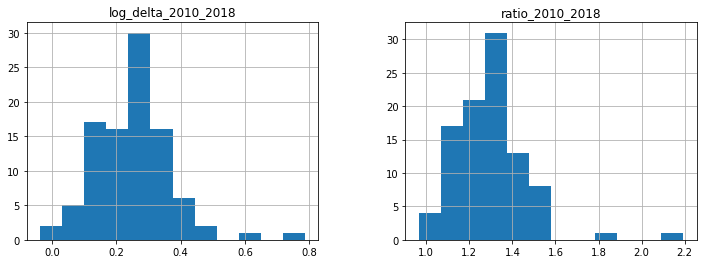

In [292]:
df_garde_enf_2010_2018[["log_delta_2010_2018", "ratio_2010_2018"]].hist(bins = 12, figsize=(12,4));

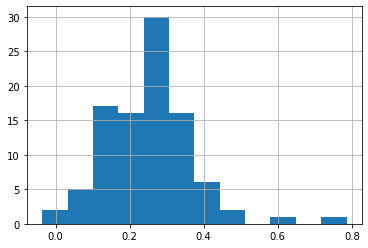

In [293]:
df_garde_enf_2010_2018.log_delta_2010_2018.hist(bins = 12)

#### On peut regarder l'évolution du nombre de naissance par département en fonction du quintile de l'évolution de nombre de place de garde

In [294]:
df_grpby_DEP = df.groupby("DEP").sum()

In [295]:
df_grpby_DEP_2 = df.groupby("DEP").agg({"Quantile_income":np.mean})

<IPython.core.display.Javascript object>

In [296]:
df_grpby_DEP = pd.concat([df_grpby_DEP[nais_year_variables], df_grpby_DEP_2], axis = 1)

In [297]:
#df_garde_enf.columns

In [298]:
df_garde_enf_2010_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEP                       96 non-null     object 
 1   Unnamed: 1                96 non-null     object 
 2   2010                      96 non-null     float64
 3   2011                      96 non-null     float64
 4   2012                      96 non-null     float64
 5   2013                      96 non-null     float64
 6   2014                      96 non-null     float64
 7   2015                      96 non-null     float64
 8   2016                      96 non-null     float64
 9   2017                      96 non-null     float64
 10  2018                      96 non-null     float64
 11  delta_r_2010_2018         96 non-null     float64
 12  ratio_2010_2018           96 non-null     float64
 13  log_delta_2010_2018       96 non-null     float64
 14  delta_2010_2

In [299]:
df_garde_enf_2010_2018.DEP = df_garde_enf_2010_2018.DEP.astype("str")

/Users/adrienpacifico/Library/Caches/pypoetry/virtualenvs/fertility-freely-available-data-sources-Ebk-O8z8-py3.8/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [300]:
df_gard_nais = pd.merge(df_garde_enf_2010_2018,df_grpby_DEP.reset_index(), on="DEP")

In [301]:
set(df_garde_enf_2010_2018.DEP) - set(df_gard_nais.DEP)

{'20R', '971'}

In [302]:
df_gard_nais.shape

(94, 26)

In [303]:
df_gard_nais.delta_2010_2018_quintile.value_counts()

3.0    19
1.0    19
2.0    19
5.0    19
4.0    18
Name: delta_2010_2018_quintile, dtype: int64

In [304]:
df_gard_nais.groupby("delta_2010_2018_quintile").size()

delta_2010_2018_quintile
1.0    19
2.0    19
3.0    19
4.0    18
5.0    19
dtype: int64

In [305]:
df_gard_nais.groupby("delta_2010_2018_quintile").sum()[nais_year_variables]

,NAISD09,NAISD10,NAISD11,NAISD12,NAISD13,NAISD14,NAISD15,NAISD16,NAISD17,NAISD18
delta_2010_2018_quintile,,,,,,,,,,
1.0,80795.0,81482.0,79892.0,79289.0,77717.0,77152.0,73979.0,72770,70284,68669
2.0,161258.0,162424.0,160606.0,160910.0,159932.0,160681.0,157504.0,154733,152071,150324
3.0,182121.0,184777.0,182942.0,182710.0,180420.0,180518.0,177217.0,172714,169778,167230
4.0,189380.0,191441.0,189024.0,188320.0,186041.0,186112.0,180810.0,177501,173797,172465
5.0,161959.0,164361.0,162430.0,161168.0,159867.0,159101.0,153572.0,150003,148093,144640


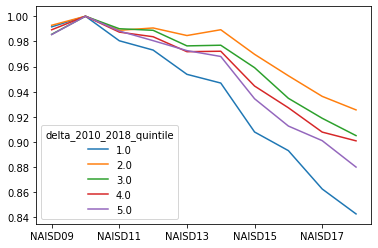

In [306]:
(df_gard_nais.groupby("delta_2010_2018_quintile").sum()[nais_year_variables].T/df_gard_nais.groupby("delta_2010_2018_quintile").sum()["NAISD10"]).plot()

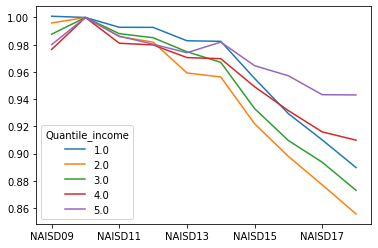

In [307]:
(df.groupby("Quantile_income")[nais_year_variables].sum().T/df.groupby("Quantile_income")["NAISD10"].sum().values).plot()

In [308]:
df_gard_nais[["Quantile_income","delta_2010_2018_quintile" ]].astype("float").corr()

,Quantile_income,delta_2010_2018_quintile
Quantile_income,1.000000,0.190898
delta_2010_2018_quintile,0.190898,1.000000


### Vote aux élections

#### Vote aux élections présidentielles de 2017

In [309]:
class Enfant:
    enfant = True
    def __init__(self, age=None, nom=None):
        self.nom = nom
        self.age = age
        self.notes = []
        if self.age is None:
            self.age = input("Quel est son age ?")
        if self.nom is None:
            self.nom = input("Quel est son nom ?")
    def controle(self):
        self.notes.append(np.random.randint(0,20))
        

In [310]:
#un_enfant = Enfant(24)

In [311]:
#un_enfant.controle()

In [312]:
#un_enfant.notes

In [313]:
import pandas as pd

In [314]:
import urllib

try:
    df_votes = pd.read_csv("presidentielles_tour_1_2017.csv", delimiter=",", low_memory=False)
except FileNotFoundError:
    urllib.request.urlretrieve("https://www.data.gouv.fr/fr/datasets/r/d61a1778-3db4-4f15-bf67-f7d0429a813b", "presidentielles_tour_1_2017.csv")
    df_votes = pd.read_csv("presidentielles_tour_1_2017.csv", delimiter=",", low_memory=False)
    
    
    
    #urllib.request.urlretrieve("https://www.data.gouv.fr/s/resources/election-presidentielle-des-23-avril-et-7-mai-2017-resultats-definitifs-du-1er-tour-par-communes/20170427-100544/Presidentielle_2017_Resultats_Communes_Tour_1_c.xls", "municipales_tour2_2014.csv")
    #df_votes = pd.read_csv("municipales_tour2_2014.csv", delimiter=";", low_memory=False)
    
    #urllib.request.urlretrieve("http://www.regardscitoyens.org/telechargement/donnees/elections/2014_municipales/municipales-2014-r%C3%A9sultats-bureaux_vote-tour2.csv", "municipales_tour2_2014.csv")
    #df_votes = pd.read_csv("municipales_tour2_2014.csv", delimiter=";", low_memory=False)
    
    
    #urllib.request.urlretrieve("http://www.regardscitoyens.org/telechargement/donnees/elections/2014_europeennes/europ%C3%A9ennes-2014-r%C3%A9sultats-bureaux_vote-tour1.csv", "europeennes_2014.csv")
    #df_votes = pd.read_csv("europeennes_2014.csv", delimiter=";", low_memory=False)

In [315]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35719 entries, 0 to 35718
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dc             35719 non-null  object
 1   ARTHAUD        35719 non-null  int64 
 2   ASSELINEAU     35719 non-null  int64 
 3   CHEMINADE      35719 non-null  int64 
 4   DUPONT-AIGNAN  35719 non-null  int64 
 5   FILLON         35719 non-null  int64 
 6   HAMON          35719 non-null  int64 
 7   LASSALLE       35719 non-null  int64 
 8   LE PEN         35719 non-null  int64 
 9   MACRON         35719 non-null  int64 
 10  MÉLENCHON      35719 non-null  int64 
 11  POUTOU         35719 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 3.3+ MB


In [316]:
df_votes

,dc,ARTHAUD,ASSELINEAU,CHEMINADE,DUPONT-AIGNAN,FILLON,HAMON,LASSALLE,LE PEN,MACRON,MÉLENCHON,POUTOU
0,01001,4,6,2,34,110,29,2,126,119,59,4
1,01002,2,1,0,6,34,13,0,48,37,33,2
2,01004,40,71,5,346,1084,344,60,1667,1332,1412,91
3,01005,5,10,0,45,197,37,6,306,191,126,10
4,01006,1,0,0,4,14,3,1,18,15,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...
35714,ZZ226,2,3,0,1,62,10,0,16,115,26,1
35715,ZZ227,0,4,0,13,197,63,2,49,251,131,1
35716,ZZ228,0,6,0,8,65,14,1,35,92,30,0
35717,ZZ229,27,87,18,205,2893,567,41,622,4672,1050,61


In [317]:
#df_votes["CODGEO"] = df_votes["Code département"].str.cat(df_votes['Code commune'].astype("str"))
#df_votes = df_votes.groupby("CODGEO").sum()

In [318]:
#df_votes["Code nuance de la liste"].value_counts()

In [319]:
candidats = df_votes.iloc[:,1:].columns

In [320]:
candidats

Index(['ARTHAUD', 'ASSELINEAU', 'CHEMINADE', 'DUPONT-AIGNAN', 'FILLON',
       'HAMON', 'LASSALLE', 'LE PEN', 'MACRON', 'MÉLENCHON', 'POUTOU'],
      dtype='object')

In [321]:
df_votes["Total_votes"] = df_votes.iloc[:,1:].sum(axis=1)

In [322]:
df_votes["Total_votes"]

0          495
1          176
2         6452
3          933
4           77
         ...  
35714      236
35715      711
35716      251
35717    10243
35718      676
Name: Total_votes, Length: 35719, dtype: int64

In [323]:
def changedclass(cls):
  def __init__(self, *a, **k):
    cls.__init__(self, *a, **k)
    self.murf = 45
  return type(cls.__name__, (cls,), {'foobar': 23, '__init__': __init__})

In [324]:
#class value_counts2(pd.value_counts):
#    def __init__(self, *a, **k):
#        self.value_counts = pd.value_counts(dropna = False)

In [325]:
df_votes.iloc[:,1:-1] = df_votes.iloc[:,1:-1].div(df_votes.Total_votes, axis = 0)


In [326]:
#### Je crée le vote à droite et à gauche (le classement est discutable, on peut tester avec une autre barre politique)


df_votes["prct_gauche"] = df_votes[["ARTHAUD", "HAMON","MÉLENCHON", "POUTOU"]].sum(axis=1)
df_votes["prct_droite"] = df_votes[["ASSELINEAU", "DUPONT-AIGNAN","FILLON", "LASSALLE", "LE PEN", "MACRON"]].sum(axis=1)

df_votes["prct_populiste"] = df_votes[["ARTHAUD","ASSELINEAU", "CHEMINADE", "DUPONT-AIGNAN", "LASSALLE", "LE PEN", "MÉLENCHON", "POUTOU"]].sum(axis=1)
df_votes["prct_establishment"] = 1 - df_votes["prct_populiste"]



In [327]:
df_votes

,dc,ARTHAUD,ASSELINEAU,CHEMINADE,DUPONT-AIGNAN,FILLON,HAMON,LASSALLE,LE PEN,MACRON,MÉLENCHON,POUTOU,Total_votes,prct_gauche,prct_droite,prct_populiste,prct_establishment
0,01001,0.008081,0.012121,0.004040,0.068687,0.222222,0.058586,0.004040,0.254545,0.240404,0.119192,0.008081,495,0.193939,0.802020,0.478788,0.521212
1,01002,0.011364,0.005682,0.000000,0.034091,0.193182,0.073864,0.000000,0.272727,0.210227,0.187500,0.011364,176,0.284091,0.715909,0.522727,0.477273
2,01004,0.006200,0.011004,0.000775,0.053627,0.168010,0.053317,0.009299,0.258369,0.206448,0.218847,0.014104,6452,0.292467,0.706758,0.572226,0.427774
3,01005,0.005359,0.010718,0.000000,0.048232,0.211147,0.039657,0.006431,0.327974,0.204716,0.135048,0.010718,933,0.190782,0.809218,0.544480,0.455520
4,01006,0.012987,0.000000,0.000000,0.051948,0.181818,0.038961,0.012987,0.233766,0.194805,0.246753,0.025974,77,0.324675,0.675325,0.584416,0.415584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35714,ZZ226,0.008475,0.012712,0.000000,0.004237,0.262712,0.042373,0.000000,0.067797,0.487288,0.110169,0.004237,236,0.165254,0.834746,0.207627,0.792373
35715,ZZ227,0.000000,0.005626,0.000000,0.018284,0.277075,0.088608,0.002813,0.068917,0.353024,0.184248,0.001406,711,0.274262,0.725738,0.281294,0.718706
35716,ZZ228,0.000000,0.023904,0.000000,0.031873,0.258964,0.055777,0.003984,0.139442,0.366534,0.119522,0.000000,251,0.175299,0.824701,0.318725,0.681275
35717,ZZ229,0.002636,0.008494,0.001757,0.020014,0.282437,0.055355,0.004003,0.060724,0.456116,0.102509,0.005955,10243,0.166455,0.831788,0.206092,0.793908


In [328]:
print(df.shape, df_votes.shape)
df = pd.merge(df, df_votes, left_on="CODGEO",right_on="dc")

(34490, 42) (35719, 17)


In [329]:

df["NAIS10_18_∆prct"] = (df.NAISD18-df.NAISD10)/df.NAISD10

In [330]:
#df.corr()["NAIS10_18_∆prct"][candidats].sort_values(ascending=False)

In [331]:
df[candidats].mean().sort_values(ascending = False)

LE PEN           0.263883
MACRON           0.203867
FILLON           0.199463
MÉLENCHON        0.172337
DUPONT-AIGNAN    0.057230
HAMON            0.052348
LASSALLE         0.020455
POUTOU           0.012627
ASSELINEAU       0.008341
ARTHAUD          0.007536
CHEMINADE        0.001913
dtype: float64

In [332]:
a = (df[candidats].mean()>0.05)
candidats_over_5_prct = a[a].index

In [333]:
a[a]

DUPONT-AIGNAN    True
FILLON           True
HAMON            True
LE PEN           True
MACRON           True
MÉLENCHON        True
dtype: bool

In [334]:
import statsmodels.api as smf

In [335]:
df.shape

(34432, 60)

In [336]:
df_reg = df.dropna(how = "all"); df_reg.shape

(34432, 60)

In [337]:
df_reg.CODGEO.str[:2].shape

(34432,)

In [338]:
df_reg.CODGEO.str[:2]

0        01
1        01
2        01
3        01
4        01
         ..
34427    95
34428    95
34429    95
34430    95
34431    95
Name: CODGEO, Length: 34432, dtype: object

In [339]:
#df_garde_enf

In [340]:
#df_reg_2 = df_reg.merge(df_garde_enf, left_on=df_reg.CODGEO.str[:2], right_on="DÉPARTEMENTS", how="left").dropna()

In [341]:
#df_reg_2.shape

In [342]:
#list(candidats_over_5_prct)+['a ']

In [343]:
#fit = smf.OLS(df_reg["NAIS10_18_∆prct"], df_reg[list(candidats_over_5_prct)+["prct_populiste", "tot_mono_multi_acceuil"]]).fit()

In [344]:
#df_reg["NAIS10_18_∆prct"].shape

In [345]:
#fit.summary()

#### Nombre moyen de naissance par femme en age de procéer

On utilise les enquêtes de rencencement

In [346]:
%%time
data_path = "../fetched_data/"
df = pd.read_csv(data_path+'RP19682016.csv', sep = ";", low_memory=False)

CPU times: user 49 s, sys: 16.4 s, total: 1min 5s
Wall time: 1min 6s


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45505195 entries, 0 to 45505194
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   AN_RECENS   int64  
 1   DEP_RES_18  object 
 2   DEP_NAIS    object 
 3   DEP_TRA_18  object 
 4   DEP_RAN_18  object 
 5   REG_RES_18  int64  
 6   REG_NAIS    object 
 7   REG_TRA_18  object 
 8   REG_RAN_18  object 
 9   AGE_REV     int64  
 10  SEXE        int64  
 11  STAT_CONJ   object 
 12  NATIO       object 
 13  DIPL        object 
 14  TYP_ACT     int64  
 15  NES4        int64  
 16  CSP         int64  
 17  POND        float64
dtypes: float64(1), int64(7), object(10)
memory usage: 6.1+ GB


In [348]:
df_2016=df.query("AN_RECENS==2016"); del df

In [349]:
df_2016

,AN_RECENS,DEP_RES_18,DEP_NAIS,DEP_TRA_18,DEP_RAN_18,REG_RES_18,REG_NAIS,REG_TRA_18,REG_RAN_18,AGE_REV,SEXE,STAT_CONJ,NATIO,DIPL,TYP_ACT,NES4,CSP,POND
38608061,2016,01,01,***,01,84,84,**,84,1,1,B,000,*,6,9,9,1588.499610
38608062,2016,01,01,***,01,84,84,**,84,1,1,B,1ES,*,6,9,9,3.157411
38608063,2016,01,01,***,01,84,84,**,84,1,1,B,1IT,*,6,9,9,3.600822
38608064,2016,01,01,***,01,84,84,**,84,1,1,B,1PT,*,6,9,9,25.832346
38608065,2016,01,01,***,01,84,84,**,84,1,1,B,2**,*,6,9,9,9.651694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45505190,2016,974,9Y,974,974,4,99,04,04,54,2,B,000,D,1,2,6,2.582770
45505191,2016,974,9Y,974,974,4,99,04,04,55,2,A,000,B,1,4,5,2.547605
45505192,2016,974,9Y,974,974,4,99,04,04,56,1,B,000,D,1,4,3,2.537490
45505193,2016,974,9Y,974,974,4,99,04,04,64,1,A,000,B,1,4,2,2.562629


TODO: Faire carte nombre de places de garde en fonction du nombre de femmes en age de procréer.  
    Nombre de places de garde en fonction du nombre d'enfants en bas age.

In [350]:
label_csp = {
1 : "Agriculteurs",
2 : "Artisans-commerçants-chefs d'entreprise",
3 : "Cadres et professions intellectuelles supérieures",
4 : "Professions intermédiaires",
5 : "Employés",
6 : "Ouvriers",
8 : "Anciens actifs",
9 : "Inactifs et chômeurs n'ayant jamais travaillé",}

In [351]:
df_2016.CSP.value_counts(normalize=True).rename(label_csp)

Employés                                             0.176273
Professions intermédiaires                           0.172216
Inactifs et chômeurs n'ayant jamais travaillé        0.161072
Anciens actifs                                       0.156173
Ouvriers                                             0.142168
Cadres et professions intellectuelles supérieures    0.128743
Artisans-commerçants-chefs d'entreprise              0.054834
Agriculteurs                                         0.008520
Name: CSP, dtype: float64

In [352]:
df_2016.query("(17<AGE_REV<45)&(SEXE=='2')")

,AN_RECENS,DEP_RES_18,DEP_NAIS,DEP_TRA_18,DEP_RAN_18,REG_RES_18,REG_NAIS,REG_TRA_18,REG_RAN_18,AGE_REV,SEXE,STAT_CONJ,NATIO,DIPL,TYP_ACT,NES4,CSP,POND
38608321,2016,01,01,***,01,84,84,**,84,18,2,A,000,*,3,9,9,2.896120
38608322,2016,01,01,***,01,84,84,**,84,18,2,B,000,*,3,9,9,614.995642
38608323,2016,01,01,***,01,84,84,**,84,18,2,B,000,A,2,9,5,22.716570
38608324,2016,01,01,***,01,84,84,**,84,18,2,B,000,A,2,9,6,2.855002
38608325,2016,01,01,***,01,84,84,**,84,18,2,B,000,A,2,9,9,27.172605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45505163,2016,974,9Y,974,974,4,99,04,04,39,2,A,000,D,1,4,4,2.582770
45505164,2016,974,9Y,974,974,4,99,04,04,40,2,A,000,D,1,4,4,2.521609
45505167,2016,974,9Y,974,974,4,99,04,04,41,2,A,000,C,1,4,5,2.494697
45505170,2016,974,9Y,974,974,4,99,04,04,42,2,B,000,D,1,4,4,2.500864


<IPython.core.display.Javascript object>

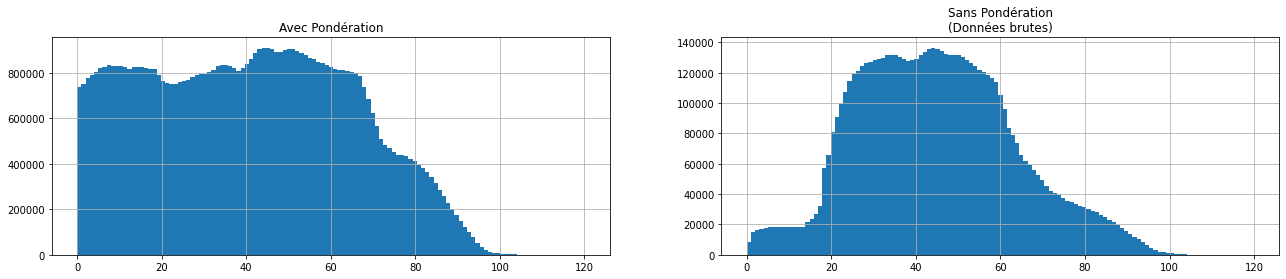

In [353]:
fig, axes = plt.subplots(1, 2)

df_2016.AGE_REV.hist(bins=df_2016.AGE_REV.nunique(), weights=df_2016.POND, ax=axes[0], figsize=(22,4))
df_2016.AGE_REV.hist(bins=df_2016.AGE_REV.nunique(), ax=axes[1])

axes[0].set_title("Avec Pondération")
axes[1].set_title("Sans Pondération\n(Données brutes)");

In [354]:
df_2016.query("AGE_REV==20").shape

(81071, 18)

In [355]:
df_2016.query("AGE_REV==20").POND.sum()

763844.0438229179

In [356]:
df_2016.AGE_REV.value_counts().sort_index().tail(10)

111    21
112    31
113    31
114    53
115    59
116    64
117    36
118     3
119    28
120     3
Name: AGE_REV, dtype: int64

### Nombre de femmes en age de procréer par département

In [357]:
df_2016.columns

Index(['AN_RECENS', 'DEP_RES_18', 'DEP_NAIS', 'DEP_TRA_18', 'DEP_RAN_18',
       'REG_RES_18', 'REG_NAIS', 'REG_TRA_18', 'REG_RAN_18', 'AGE_REV', 'SEXE',
       'STAT_CONJ', 'NATIO', 'DIPL', 'TYP_ACT', 'NES4', 'CSP', 'POND'],
      dtype='object')

In [358]:
df_2016[['DEP_RES_18', 'DEP_NAIS', 'DEP_TRA_18', 'DEP_RAN_18',
       'REG_RES_18', 'REG_NAIS', 'REG_TRA_18', 'REG_RAN_18']] = df_2016[['DEP_RES_18', 'DEP_NAIS', 'DEP_TRA_18', 'DEP_RAN_18',
                                                                        'REG_RES_18', 'REG_NAIS', 'REG_TRA_18', 'REG_RAN_18']].astype("str")

In [359]:
df_nb_f_fertile_by_dep = df_2016.query("17<AGE_REV<45").groupby("DEP_NAIS").POND.sum()
df_nb_f_fertile_by_dep.index = df_nb_f_fertile_by_dep.index.astype("str")

### Nombre de naissances par département

In [360]:
df_nb_nais_by_dep = df_naissances_ec.groupby("depnais").size()
df_nb_nais_by_dep.name = "naissances"
df_nb_nais_by_dep.index = df_nb_nais_by_dep.index.astype("str")

In [361]:
df_nb_f_fertile_by_dep.index.astype("str")

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       ...
       '971', '972', '973', '974', '975', '976', '977', '978', '99', '9Y'],
      dtype='object', name='DEP_NAIS', length=106)

In [362]:
df_garde_enf_2018["DÉPARTEMENTS"] = df_garde_enf_2018["DÉPARTEMENTS"].astype("str")
df_garde_enf_2018.set_index("DÉPARTEMENTS").tot_mono_multi_acceuil.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20R', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69D', '69M', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94',
       '95', '971', '972', '973', '974'],
      dtype='object', name='DÉPARTEMENTS')

In [363]:
df_garde_enf_2010_2018[2018]

0      2994.0
1      1201.0
2       827.0
3      1078.0
4       977.0
       ...   
95    26077.0
96    13818.0
97    16349.0
98     6961.0
99     2464.0
Name: 2018, Length: 96, dtype: float64

In [364]:
df.Quantile_income

NameError: name 'df' is not defined

In [ ]:
df["DEP"] = df.CODGEO.str[:-3]

In [ ]:
pd.qcut(df.groupby("DEP").MED15.mean(),5, labels = False)+1

In [ ]:
df_dep = (
pd.concat([df_nb_f_fertile_by_dep, 
           df_nb_nais_by_dep,
           df_garde_enf_2010_2018.set_index("DEP")[2018],
          pd.qcut(df.groupby("DEP").MED15.mean(),5, labels = False)+1],
          axis=1)
.rename({
    2018:"nombre_places_de_garde",
    'POND':"nb_femme_17_45",
    "MED15":"quintile_revenu"
}, axis = 1)
.assign(
    nais_par_femmes=lambda x:x.naissances/x.nb_femme_17_45,
    places_acc_par_nais= lambda x: x["nombre_places_de_garde"]/x.naissances,
)
)

In [ ]:
df_dep.columns

In [ ]:
df_grpby_DEP_2.index

In [ ]:
df.set_index(df.CODGEO.str[:-3])

In [ ]:
df_grpby_DEP_2

In [ ]:
df_grpby_DEP_2.index

In [ ]:
df_dep.shape

In [ ]:
sns.pairplot(df_dep, hue="quintile_revenu")

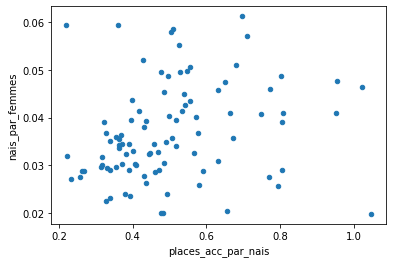

In [365]:
df_dep.plot("places_acc_par_nais", "nais_par_femmes", kind="scatter")

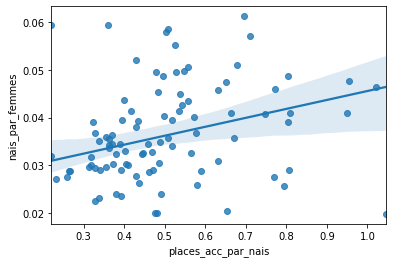

In [366]:
import seaborn as sns
sns.regplot("places_acc_par_nais", "nais_par_femmes", df_dep,  robust=True)

In [367]:
pd.merge(df_nb_f_fertile_by_dep, df_nb_nais_by_dep,left_index=True, right_index=True)

,POND,naissances
01,95451.241354,3722
02,191031.284592,5183
03,109282.168185,3136
04,27677.748620,1134
05,31987.138071,1305
...,...,...
971,145448.414757,4175
972,139131.337353,3670
973,62238.866572,8079
974,294284.032814,13912


In [368]:
df_nb_f_fertile_by_dep.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       ...
       '971', '972', '973', '974', '975', '976', '977', '978', '99', '9Y'],
      dtype='object', name='DEP_NAIS', length=106)

In [369]:
df_garde_enf_2018.set_index("DÉPARTEMENTS").tot_mono_multi_acceuil

DÉPARTEMENTS
01     125.0
02      75.0
03      47.0
04      49.0
05      43.0
       ...  
95     250.0
971     86.0
972    100.0
973     36.0
974    318.0
Name: tot_mono_multi_acceuil, Length: 100, dtype: float64

In [370]:
df_nb_f_fertile_by_dep

DEP_NAIS
01     9.545124e+04
02     1.910313e+05
03     1.092822e+05
04     2.767775e+04
05     3.198714e+04
           ...     
976    2.199465e+04
977    8.214867e+01
978    1.757021e+03
99     2.956655e+06
9Y     2.060687e+04
Name: POND, Length: 106, dtype: float64

In [371]:
df_nb_f_fertile_by_dep.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       ...
       '971', '972', '973', '974', '975', '976', '977', '978', '99', '9Y'],
      dtype='object', name='DEP_NAIS', length=106)

# Nowcasting des naissances avec google trends (poussettes, cèche, materninté, etc )

In [ ]:
!pip install pytrends

In [1]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='fr-FR', tz=360)

In [2]:
from pytrends.request import TrendReq
pytrend = TrendReq()

In [3]:
pytrend.build_payload(kw_list=["Poussette", "couches", "césarienne"])
# Interest by Region
df = pytrend.interest_by_region(geo='FR')
#df.sort_values("Taylor Swift", ascending = False).head(20)

In [4]:
df.loc["France"]

Poussette     78
couches       19
césarienne     3
Name: France, dtype: int64

In [51]:
kw_list = [ "vodka"]
pytrend.build_payload(kw_list=kw_list, geo='FR', timeframe = '2006-12-31 2019-01-25')
interest_over_time_vodka = pytrend.interest_over_time()
interest_over_time_df

,vodka,isPartial
date,,
2007-01-01,37,False
2007-02-01,35,False
2007-03-01,37,False
2007-04-01,37,False
2007-05-01,31,False
...,...,...
2018-09-01,57,False
2018-10-01,59,False
2018-11-01,56,False


In [62]:
kw_list = ["césarienne" ]
pytrend.build_payload(kw_list=kw_list, geo='FR', timeframe = '2006-12-31 2019-01-25')
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df


,césarienne,isPartial
date,,
2007-01-01,29,False
2007-02-01,50,False
2007-03-01,36,False
2007-04-01,43,False
2007-05-01,36,False
...,...,...
2018-09-01,75,False
2018-10-01,60,False
2018-11-01,63,False


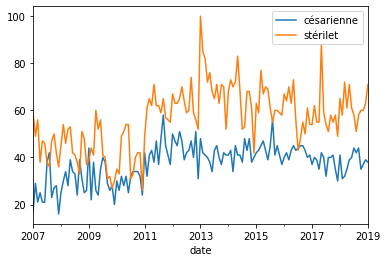

In [60]:
interest_over_time_df.plot()

In [92]:
nais_by_year.index = pd.to_datetime(nais_by_year.index, format='%Y')

<IPython.core.display.Javascript object>

In [89]:
pd.to_datetime(2009)

<IPython.core.display.Javascript object>

Timestamp('1970-01-01 00:00:00.000002009')

In [85]:
interest_over_time_df

,césarienne,isPartial
date,,
2007-01-01,29,False
2007-02-01,50,False
2007-03-01,36,False
2007-04-01,43,False
2007-05-01,36,False
...,...,...
2018-09-01,75,False
2018-10-01,60,False
2018-11-01,63,False


In [98]:
nais_by_year/nais_by_year.iloc[0]

2009-01-01    1.000000
2010-01-01    1.010691
2011-01-01    0.998232
2012-01-01    0.995194
2013-01-01    0.983753
2014-01-01    0.983738
2015-01-01    0.957321
2016-01-01    0.937554
2017-01-01    0.920174
2018-01-01    0.906297
dtype: float64

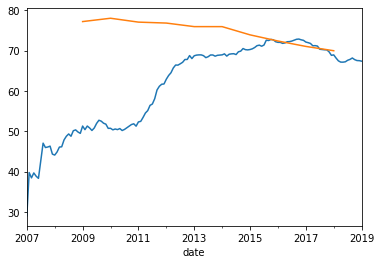

In [103]:
interest_over_time_df["césarienne"].ewm(span = 40).mean().plot()
(70*(nais_by_year/nais_by_year.iloc[9])).plot()

In [104]:
pytrend.suggestions(keyword='maternité')

[{'mid': '/m/05_5p_d', 'title': 'Maternity hospital', 'type': 'Topic'},
 {'mid': '/g/11c2qt3p0w',
  'title': 'Lucky Boy',
  'type': 'Novel by Shanthi Sekaran'},
 {'mid': '/m/0100hrm0', 'title': 'Thyme Maternity', 'type': 'Company'},
 {'mid': '/g/120x6kdy',
  'title': 'Congé de maternité en France',
  'type': 'Topic'}]

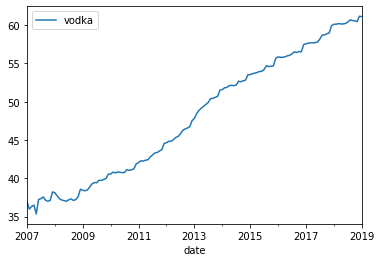

In [56]:
interest_over_time_vodka[[ 'vodka']].ewm(span = 90).mean().plot()

In [57]:
kw_list = ["Poussette", "couches", "césarienne", "maternité"]
df_trend = pytrends.get_historical_interest(kw_list, year_start=2011, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='FR', gprop='', sleep=60)

KeyboardInterrupt: 

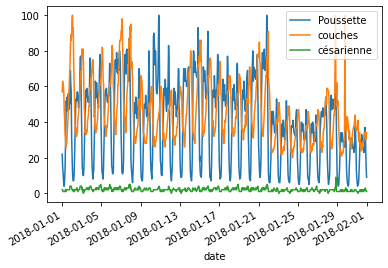

In [388]:
df_trend.plot()

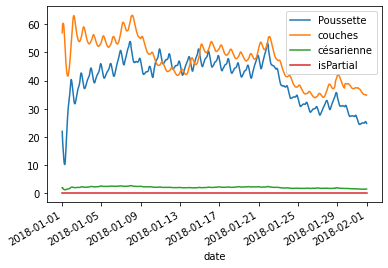

In [392]:
df_trend.ewm(span = 90).mean().plot()



In [395]:
df_trend

,Poussette,couches,césarienne,isPartial
date,,,,
2018-01-01 00:00:00,22,57,2,False
2018-01-01 01:00:00,15,63,2,False
2018-01-01 02:00:00,12,61,1,False
2018-01-01 03:00:00,8,60,1,False
2018-01-01 04:00:00,4,56,1,False
...,...,...,...,...
2018-01-31 20:00:00,37,34,2,False
2018-01-31 21:00:00,34,34,3,False
2018-01-31 22:00:00,23,30,2,False


In [ ]:
df_revenus.shape

In [ ]:
df_naissances = pd.read_excel("/Users/adrienpacifico/Downloads/base_naissances_2017.xls", header = 5)

In [ ]:
df_naissances.shape

In [ ]:
df = pd.merge(df_revenus, df_naissances, on = ["LIBGEO", "CODGEO"], how = "inner")

In [ ]:
df_revenus.columns

In [ ]:
df.shape

In [ ]:
df_naissances

On a perdu 275 communes, si une belle âme veut bien chercher pourquoi.

#### On droppe les communes où le niveau de vie médian ou le nombre de naissance n'est pas renseigné.

In [ ]:
df.shape

In [ ]:
missing_value = (df[["MED15"]+[ "NAISD{}".format(str(year).zfill(2)) for year in range(8,18)]].isna().sum(axis = 1)).astype("bool")
df = df.loc[~missing_value]

In [ ]:
df.shape

In [ ]:
df["Quantile_income"] = pd.qcut(df.MED15, 10, labels = False)

In [ ]:
 pd.qcut(df.MED15, 10).value_counts().sort_index()

In [ ]:
df['Last_decile'] = df.Quantile_income == 9

In [ ]:
df["Diff_in_fertility"] = (
                          df[["NAISD15","NAISD16","NAISD17"]].mean(axis = 1)
                        - df[["NAISD09","NAISD10","NAISD11"]].mean(axis = 1)
)

In [ ]:
df["Diff_in_fertility"] = (
                          df[["NAISD17"]].mean(axis = 1)
                        - df[["NAISD14"]].mean(axis = 1)
)

In [ ]:
df["Diff_in_fertility_growth"] = (
                      (   df["NAISD17"]
                        - df["NAISD14"]
                      )/(df["NAISD14"])
).replace([np.inf, -np.inf], np.nan)

In [ ]:
#df.Diff_in_fertility_growth.replace([np.inf, -np.inf], np.nan).value_counts(dropna = False)

In [ ]:
print(df.query("Quantile_income == 9").Diff_in_fertility.mean())
print(df.query("Quantile_income != 9").Diff_in_fertility.mean())

In [ ]:
print(df.query("Quantile_income == 9").Diff_in_fertility_growth.mean())
print(df.query("Quantile_income != 9").Diff_in_fertility_growth.mean())

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.groupby("Quantile_income").Diff_in_fertility.mean()

In [ ]:
plt.plot(df.groupby("Quantile_income").Diff_in_fertility.mean()
         /df.groupby("Quantile_income").NAISD11.sum())

In [ ]:
k = np.array([0,4,12,16,20,36])

In [ ]:
y = k**(1/2)
y

In [ ]:
df.groupby("Quantile_income").Diff_in_fertility_growth.mean().mean()

In [ ]:
%matplotlib inline

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.stats.ztest(df.query("~Last_decile").Diff_in_fertility,
              df.query("~Last_decile").Diff_in_fertility)

Pas statistiquement différent.

In [ ]:
df["Diff_in_fertility"] = (
                          df[["NAISD17"]].mean(axis = 1)
                        - df[["NAISD09","NAISD10"]].mean(axis = 1)
)

In [ ]:
print(df.query("Quantile_income == 9").Diff_in_fertility.mean())
print(df.query("Quantile_income != 9").Diff_in_fertility.mean())

In [ ]:
sm.stats.ztest(df.query("Quantile_income == 9").Diff_in_fertility,
              df.query("Quantile_income != 9").Diff_in_fertility)

Pas statistiquement significatif.

Common trend assumption

In [ ]:
df["Diff_in_fertility"] = (
                          df[["NAISD09"]].mean(axis = 1)
                        - df[["NAISD08"]].mean(axis = 1)
)
print(df.query("Quantile_income == 9").Diff_in_fertility.mean())
print(df.query("Quantile_income != 9").Diff_in_fertility.mean())

sm.stats.ztest(df.query("Quantile_income == 9").Diff_in_fertility,
              df.query("Quantile_income != 9").Diff_in_fertility)

In [ ]:
df["Diff_in_fertility"] = (
                          df[["NAISD09"]].mean(axis = 1)
                        - df[["NAISD08"]].mean(axis = 1)
)
print(df.query("Quantile_income == 9").Diff_in_fertility.mean())
print(df.query("Quantile_income != 9").Diff_in_fertility.mean())

sm.stats.ztest(df.query("Quantile_income == 9").Diff_in_fertility,
              df.query("Quantile_income != 9").Diff_in_fertility)

In [ ]:
df["Diff_in_fertility"] = (
                          df[["NAISD10"]].mean(axis = 1)
                        - df[["NAISD09"]].mean(axis = 1)
)
print(df.query("Quantile_income == 9").Diff_in_fertility.mean())
print(df.query("Quantile_income != 9").Diff_in_fertility.mean())

sm.stats.ttest_ind(df.query("Quantile_income == 9").Diff_in_fertility,
              df.query("Quantile_income != 9").Diff_in_fertility)

In [ ]:
df["Diff_in_fertility"] = (
                          df[["NAISD11"]].mean(axis = 1)
                        - df[["NAISD10"]].mean(axis = 1)
)
print(df.query("Quantile_income == 9").Diff_in_fertility.mean())
print(df.query("Quantile_income != 9").Diff_in_fertility.mean())

sm.stats.ttest_ind(df.query("Quantile_income == 9").Diff_in_fertility,
              df.query("Quantile_income != 9").Diff_in_fertility)

In [ ]:
!pip install simpledbf

In [ ]:
sm.stats.ztest(df.query("Quantile_income == 9").Diff_in_fertility,
              df.query("Quantile_income != 9").Diff_in_fertility)

In [ ]:
!pip install SQLalchemy

In [ ]:
df_naissances.columns

In [ ]:
df_naissances.nbenf.value_counts(normalize = True)

In [ ]:
1/df_naissances.nbenf.value_counts(normalize = True).iloc[2]

3,3% des enfants sont des jumeaux, 1 enfant sur 1564 est issu d'une portée de triplet, et 96% naissent sans jumeaux. 

In [ ]:
df_naissances.agemere.astype("int").mean()

In [ ]:
df_naissances.agepere.astype("int").mean()

In [ ]:
pd.DataFrame({"age mère":df_naissances.agemere.astype("int").mean(),
             "age père":df_naissances.agepere.astype("int").mean()}, index = ["moyenne"])

In [ ]:
df_naissances.agemere.value_counts(dropna = False)

In [ ]:
df_naissances.amar.value_counts()

In [ ]:
%%timeit
df.reset_index().to_feather("to_trash_feather.fth")

In [ ]:
%%timeit
df.reset_index().to_hdf("to_trash_hdf.h5", "hello")

In [ ]:
df

In [ ]:
(28+22+12)/3

In [ ]:
np.std([39,19,28])


In [ ]:
a.

In [ ]:
a = df_c.T.groupby(level = 0).describe()

In [ ]:
a.A["mean"]

In [ ]:
df_c.index

In [ ]:
a = df_c.groupby(level = 0).describe(); a

In [ ]:
a.loc[:,"Age"]["mean"]

In [ ]:
describe = df.describe().loc[["mean", "std"]].T

In [ ]:
df.describe().loc[["mean", "std"]].T.style.format({"std": "({:.2f})"})

In [ ]:
describe.style.format()

In [ ]:
new_df = pd.DataFrame()
for var in df:
    new_df.loc[var, ""] = describe.loc[var, "mean"]
    new_df.loc[var+"_std", ""] = describe.loc[var, "std"]
    

In [ ]:
"Income_std"[-3:]

In [ ]:
new_df.style.apply(parenthesis_for_std)

In [ ]:
new_df.style()

In [ ]:
new_df.style.apply()

In [ ]:
def parenthesis_for_std(s):
    is_std = s.index.str[-3:] == "std"
    return ['({})' if v else '' for v in is_std]

In [ ]:
s.index[:-3]

In [ ]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
new_df = pd.DataFrame()
new_df.loc[var,""] = 1
new_df

In [ ]:
print(a.to_dense())


In [ ]:
df.style.format({"std": "({:.2%})"})

In [ ]:
df["String"] = ["A b", "C (d)", "A long line", "A line \n break so long tgat hdlqfhkdlqjkfh", "42"]

In [ ]:
df.style

In [ ]:
df.style.set_properties(**{'word-wrap': 'break-word'})

In [ ]:
df.to_latex()

In [ ]:
pd.MultiIndex.from_arrays(arrays, names=('number', 'color'))

In [ ]:

frame1 = pd.DataFrame({'supplier1_match0': ['x'], 'id': [1]})
frame2 = pd.DataFrame({'supplier1_match0': ['2x'], 'id': [2]})

In [ ]:
data_path = "../fetched_data/"
df = pd.read_csv(data_path+'RP19682016.csv', sep = ";")

In [ ]:
df.info()

In [ ]:
df_2016=df.query("AN_RECENS==2016")

In [ ]:
df_2016.POND.sum()

In [ ]:
df_2016.POND.mean()

In [ ]:
df_2016.AGE_REV.hist(bins=60)

In [ ]:
df_2016.SEXE.plot(kind = "bar")

In [ ]:
d_2016.value_counts()